# Importing Libraries 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 

# Importing Dataset 

In [6]:
df = pd.read_csv(r"C:\Users\Atharva\OneDrive\Desktop\Capstone Project\Room_Occupany.csv")
df.head()

Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


# Data Pre-Processing

###  Missing Values

In [8]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [9]:
df.head()

Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1

### Outliers - Winsorizing Technique

<Axes: >

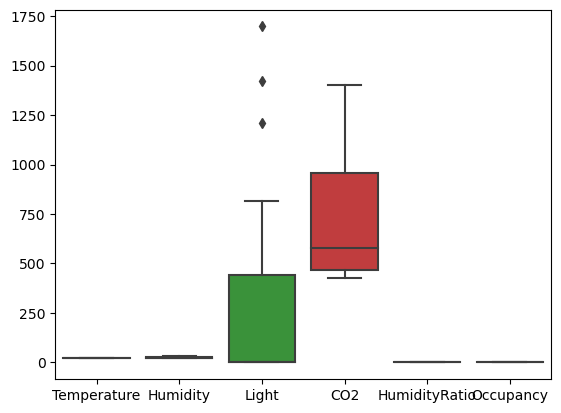

In [10]:
import seaborn as sns
sns.boxplot(data=df)

In [11]:
for i in df:               
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr 
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

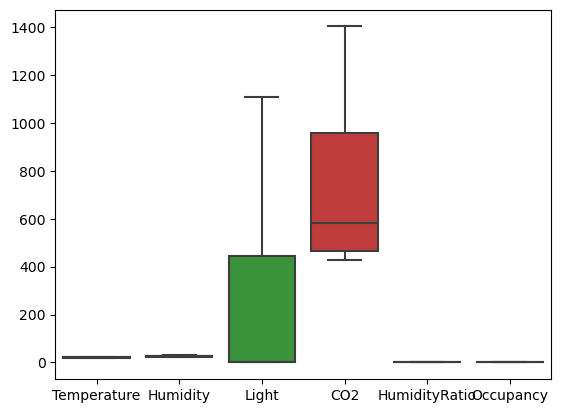

In [12]:
import seaborn as sns
sns.boxplot(data=df)

# Data Visualization

In [13]:
    import plotly.express as px

    fig = px.pie(df,names='Occupancy',color='Occupancy',
                 color_discrete_map={'Yes':'red',
                                     'No':'green'})
    fig.show()

# Model 1:-  Linear Regression

## Data Partition

In [14]:
# Putting feature variable to X
X = df.drop('Occupancy', axis= 1)

# Putting response variable to y
y = df[['Occupancy']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=134)

In [15]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

Occupancy  Temperature  Humidity       Light          CO2  HumidityRatio
1354          1        23.00    26.290  662.333333  1006.333333       0.004569
2574          1        21.66    26.216  553.000000   879.500000       0.004197
2024          0        20.83    24.870    0.000000   547.000000       0.003781
698           0        20.60    22.200    0.000000   446.250000       0.003325
1185          1        21.60    27.540  479.000000  1045.000000       0.004394

In [16]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

Correlation 

* Light and CO2 have high impact on Occupancy

## VIF

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1=df.drop(['Occupancy'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

Temperature       528.503538
Humidity          911.753235
Light               5.742148
CO2               149.738713
HumidityRatio    1573.316770
dtype: float64

* Multi-Collinearity is present in dataset

## Model Builiding

*  H0 :- There is no Linear relationship between Occupancy and all independent Variable
                         
                         Vs 

*  H1 :- There is Linear relationship between Occupancy and all independent Variable

* Alpha = 0.05 (5%)

In [18]:
# importing the models
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
lreg = LinearRegression()

Model3 = sfs(lreg, n_features_to_select= None, direction='backward', scoring='r2', cv=5)
Model3.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=None, scoring='r2')

In [20]:
Model3.feature_names_in_

array(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'],
      dtype=object)

In [21]:
Model3.get_feature_names_out()

array(['Light', 'HumidityRatio'], dtype=object)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
X_train = X_train.loc[:,['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
X_train

Temperature   Humidity       Light          CO2  HumidityRatio
1354      23.0000  26.290000  662.333333  1006.333333       0.004569
2574      21.6600  26.216000  553.000000   879.500000       0.004197
2024      20.8300  24.870000    0.000000   547.000000       0.003781
698       20.6000  22.200000    0.000000   446.250000       0.003325
1185      21.6000  27.540000  479.000000  1045.000000       0.004394
...           ...        ...         ...          ...            ...
1202      21.7000  27.890000  489.000000  1083.666667       0.004478
114       22.9120  28.100000  429.000000  1088.200000       0.004860
1399      23.2000  25.516667  557.666667   895.333333       0.004488
1574      22.7225  31.200000  442.500000  1381.500000       0.005338
1507      22.9120  30.290000  461.000000  1301.000000       0.005242

[1865 rows x 5 columns]

In [24]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

Occupancy  Temperature  Humidity       Light          CO2  HumidityRatio
1354          1        23.00    26.290  662.333333  1006.333333       0.004569
2574          1        21.66    26.216  553.000000   879.500000       0.004197
2024          0        20.83    24.870    0.000000   547.000000       0.003781
698           0        20.60    22.200    0.000000   446.250000       0.003325
1185          1        21.60    27.540  479.000000  1045.000000       0.004394

In [25]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [26]:
np.round(Model3.intercept_,3)

array([11.497])

In [27]:
np.round(Model3.coef_,4)

array([[-5.8440000e-01, -2.7150000e-01,  1.9000000e-03, -1.0000000e-04,
         1.9850613e+03]])

In [28]:
Model3.feature_names_in_

array(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'],
      dtype=object)

###  Model Equation

11.497+(-5.8440)*Temperature + 11.497+(-2.71)*Humidity + 11.497+(-1.90)*Light + 11.497+(-1.00)*CO2 + 11.497+(1.985)*HumidityRatio

# Prediction on Train

In [29]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Occupancy - train.fitted_value,2)
train

Occupancy  Temperature   Humidity       Light          CO2  \
1354          1      23.0000  26.290000  662.333333  1006.333333   
2574          1      21.6600  26.216000  553.000000   879.500000   
2024          0      20.8300  24.870000    0.000000   547.000000   
698           0      20.6000  22.200000    0.000000   446.250000   
1185          1      21.6000  27.540000  479.000000  1045.000000   
...         ...          ...        ...         ...          ...   
1202          1      21.7000  27.890000  489.000000  1083.666667   
114           1      22.9120  28.100000  429.000000  1088.200000   
1399          0      23.2000  25.516667  557.666667   895.333333   
1574          1      22.7225  31.200000  442.500000  1381.500000   
1507          1      22.9120  30.290000  461.000000  1301.000000   

      HumidityRatio  fitted_value  Residual  
1354       0.004569          1.11     -0.11  
2574       0.004197          0.99      0.01  
2024       0.003781          0.02     -0.02  
698        0.003325         -0.02      0.02  
1185       0.004394          0.90      0.10  
...             ...           ...       ...  
1202       0.004478          0.92      0.08  
114        0.004860          0.81      0.19  
1399       0.004488          0.86     -0.86  
1574       0.005338          1.02     -0.02  
1507       0.005242          1.01     -0.01  

[1865 rows x 8 columns]

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Occupancy,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  88.0


# Assumptions of Linear Regression 

### Linearity

<Axes: title={'center': 'Occupancy vs CO2'}, xlabel='HumidityRatio', ylabel='Occupancy'>

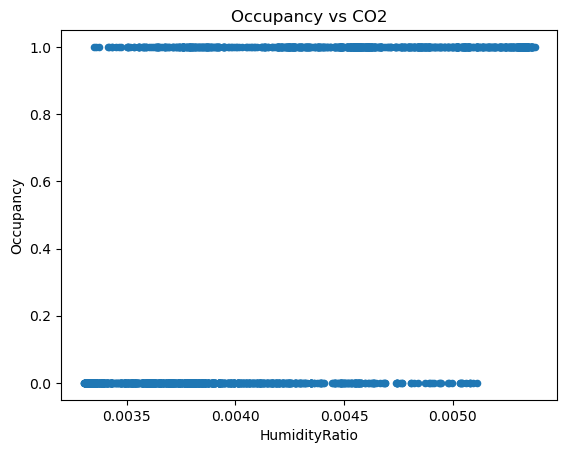

In [31]:
df.plot.scatter(x='HumidityRatio', y='Occupancy', title='Occupancy vs CO2')

###  Homoscedasticity

<Axes: xlabel='fitted_value', ylabel='Residual'>

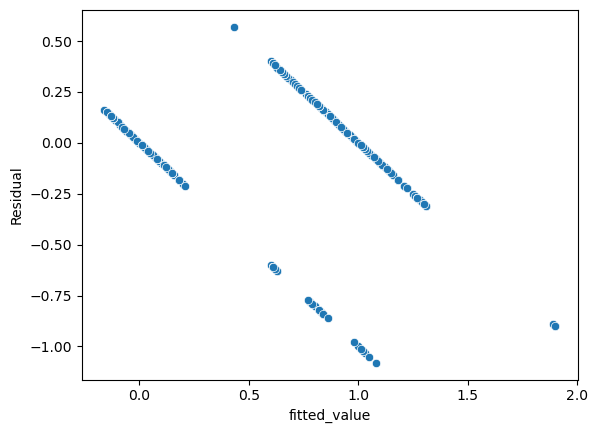

In [32]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

### Normality 

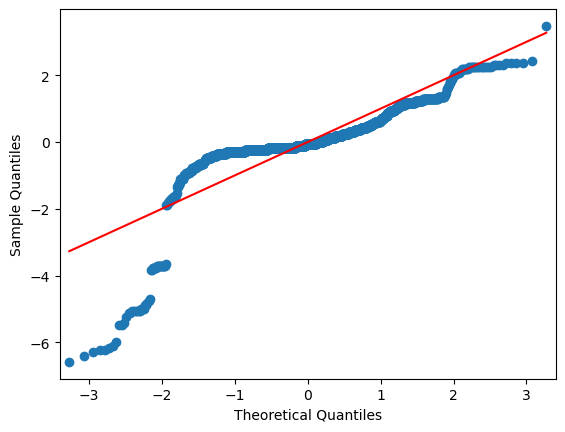

In [33]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

### Model Error has to be independent identically normally distributed

<Axes: ylabel='Frequency'>

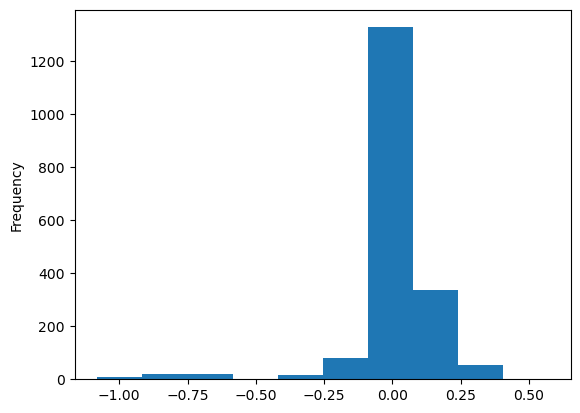

In [34]:
train['Residual'].plot.hist()

# Prediction on Test

In [35]:
X_test = X_test.loc[:,['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
X_test

Temperature   Humidity   Light          CO2  HumidityRatio
832     20.390000  22.500000    0.00   434.000000       0.003327
1515    22.917500  30.500000  465.25  1328.750000       0.005280
977     20.390000  22.700000    0.00   434.666667       0.003356
2314    20.700000  24.500000    0.00   462.333333       0.003695
2292    20.700000  24.500000    0.00   472.000000       0.003695
...           ...        ...     ...          ...            ...
702     20.580000  22.200000    0.00   444.400000       0.003321
1221    21.823333  28.133333  493.00  1142.333333       0.004551
1430    23.290000  25.890000  561.00   913.000000       0.004579
829     20.390000  22.500000    0.00   434.750000       0.003327
228     22.323333  25.000000    0.00   779.333333       0.004167

[800 rows x 5 columns]

In [36]:
test = pd.concat([y_test, X_test], axis=1)
test.head()

Occupancy  Temperature  Humidity   Light          CO2  HumidityRatio
832           0      20.3900      22.5    0.00   434.000000       0.003327
1515          1      22.9175      30.5  465.25  1328.750000       0.005280
977           0      20.3900      22.7    0.00   434.666667       0.003356
2314          0      20.7000      24.5    0.00   462.333333       0.003695
2292          0      20.7000      24.5    0.00   472.000000       0.003695

In [37]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Residual'] = np.round(test.Occupancy - test.Prediction,2)
test.head()

Occupancy  Temperature  Humidity   Light          CO2  HumidityRatio  \
832           0      20.3900      22.5    0.00   434.000000       0.003327   
1515          1      22.9175      30.5  465.25  1328.750000       0.005280   
977           0      20.3900      22.7    0.00   434.666667       0.003356   
2314          0      20.7000      24.5    0.00   462.333333       0.003695   
2292          0      20.7000      24.5    0.00   472.000000       0.003695   

      Prediction  Residual  
832         0.03     -0.03  
1515        1.03     -0.03  
977         0.03     -0.03  
2314        0.03     -0.03  
2292        0.03     -0.03

# Comparsion

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Occupancy,train.fitted_value)
print('R2 score for model Performance on Train : ', np.round(r2,2)*100)

R2 score for model Performance on Train :  88.0


In [39]:
r2 = r2_score(test.Occupancy,test.Prediction)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  92.0


# Loss Function - RSME 

In [40]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Occupancy'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2))

RMSE of Train Data :  0.16


In [42]:
model_mse = mean_squared_error(test['Occupancy'],test['Prediction'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2))

RMSE of Test Data :  0.14


# Model 2 :-  Logistic Regression

In [43]:
df1=df

# Data Import

In [44]:
import pandas as pd
df1 = pd.read_csv (r"F:\Imarticus learning\Capstone project 1\file.csv")
df1.head()

Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1

# Data Pre-Processsing 

### Outliers

<Axes: >

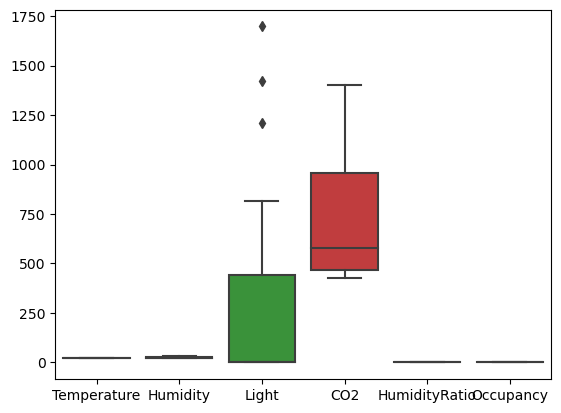

In [45]:
import seaborn as sns
sns.boxplot(data=df1)

In [46]:
for i in df1:               
    if df1[i].dtypes in ("float64","int64"): 
        q1 = df1[i].quantile(0.25)  
        q3 = df1[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr 
        df1[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

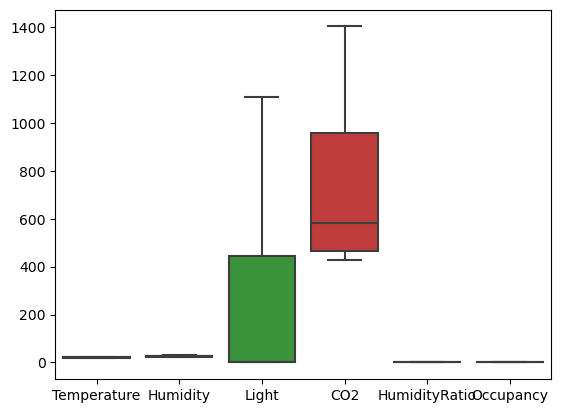

In [47]:
import seaborn as sns
sns.boxplot(data=df1)

# Data Visualization

In [48]:
    import plotly.express as px

    fig = px.pie(df,names='Occupancy',color='Occupancy',
                 color_discrete_map={'Yes':'red',
                                     'No':'green'})
    fig.show()

# Data Partition

In [49]:
# Putting feature variable to X
X = df1.drop('Occupancy', axis= 1)

# Putting response variable to y
y = df1[['Occupancy']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,random_state=56)

In [50]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

Temperature  Humidity    Light          CO2  HumidityRatio  Occupancy
2247    20.700000    24.640     0.00   479.600000       0.003716          0
705     20.566667    22.230     0.00   451.000000       0.003323          0
2603    22.700000    25.456  1106.25   958.600000       0.004343          1
2308    20.700000    24.500     0.00   464.250000       0.003695          0
1215    21.775000    28.050   499.00  1127.833333       0.004524          1

# Model Building

###  Logistic Regression

In [51]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=4, direction='forward', scoring='accuracy',cv=5)
Model3.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=4, scoring='accuracy')

In [52]:
Model3.feature_names_in_

array(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'],
      dtype=object)

In [53]:
Model3.get_feature_names_out()

array(['Temperature', 'Humidity', 'Light', 'HumidityRatio'], dtype=object)

# Prediction on Train DataSet

In [54]:
X_train = X_train.loc[:,['Temperature', 'Humidity', 'Light', 'HumidityRatio']]
X_train.head()

Temperature  Humidity    Light  HumidityRatio
2247    20.700000    24.640     0.00       0.003716
705     20.566667    22.230     0.00       0.003323
2603    22.700000    25.456  1106.25       0.004343
2308    20.700000    24.500     0.00       0.003695
1215    21.775000    28.050   499.00       0.004524

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) 

In [56]:
output.intercept_  

array([-9.57960428])

In [57]:
output.coef_ 

array([[-6.59439125e-01,  6.82477246e-01,  1.99399647e-02,
         4.25296968e-04]])

In [58]:
output.feature_names_in_

array(['Temperature', 'Humidity', 'Light', 'HumidityRatio'], dtype=object)

In [59]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

Temperature  Humidity    Light  HumidityRatio  Occupancy
2247    20.700000    24.640     0.00       0.003716          0
705     20.566667    22.230     0.00       0.003323          0
2603    22.700000    25.456  1106.25       0.004343          1
2308    20.700000    24.500     0.00       0.003695          0
1215    21.775000    28.050   499.00       0.004524          1

In [60]:
train['Probability']= output.predict_proba(X_train)[:,1]
train

Temperature  Humidity    Light  HumidityRatio  Occupancy  Probability
2247    20.700000    24.640     0.00       0.003716          0     0.001636
705     20.566667    22.230     0.00       0.003323          0     0.000345
2603    22.700000    25.456  1106.25       0.004343          1     1.000000
2308    20.700000    24.500     0.00       0.003695          0     0.001487
1215    21.775000    28.050   499.00       0.004524          1     0.994261
...           ...       ...      ...            ...        ...          ...
1146    21.200000    26.245   439.00       0.004084          1     0.957121
1259    22.100000    28.365   535.00       0.004668          1     0.997194
1442    23.315000    27.100   534.50       0.004802          1     0.985206
399     20.890000    23.100     0.00       0.003523          0     0.000505
2532    20.945000    25.390   444.00       0.003888          1     0.942127

[1865 rows x 6 columns]

In [61]:
train['Predicted'] = np.where(train['Probability'] >= 0.7,1,0) 
train.head()

Temperature  Humidity    Light  HumidityRatio  Occupancy  Probability  \
2247    20.700000    24.640     0.00       0.003716          0     0.001636   
705     20.566667    22.230     0.00       0.003323          0     0.000345   
2603    22.700000    25.456  1106.25       0.004343          1     1.000000   
2308    20.700000    24.500     0.00       0.003695          0     0.001487   
1215    21.775000    28.050   499.00       0.004524          1     0.994261   

      Predicted  
2247          0  
705           0  
2603          1  
2308          0  
1215          1

In [62]:
X_train.shape

(1865, 4)

# Model Performance Metrics

In [63]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Occupancy'])
matrix

array([[1140,    3],
       [  36,  686]], dtype=int64)

In [64]:
Accuracy_Train=((1140+686)/(1865)*100)
print(Accuracy_Train)

97.9088471849866


* Accuracy of Model is 97.90% , So we say Model good fit data  

In [65]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'],train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1176
           1       0.95      1.00      0.97       689

    accuracy                           0.98      1865
   macro avg       0.97      0.98      0.98      1865
weighted avg       0.98      0.98      0.98      1865



# Prediction on Test Data

In [66]:
X_test = X_test.loc[:,['Temperature', 'Humidity', 'Light', 'HumidityRatio']]
X_test.head()

Temperature   Humidity  Light  HumidityRatio
309         21.29  23.890000    0.0       0.003736
312         21.23  23.823333    0.0       0.003712
200         22.54  25.140000  421.8       0.004247
1677        22.50  30.100000    0.0       0.005079
2371        20.60  24.365000    0.0       0.003651

In [67]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

Temperature   Humidity  Light  HumidityRatio  Occupancy
309         21.29  23.890000    0.0       0.003736          0
312         21.23  23.823333    0.0       0.003712          0
200         22.54  25.140000  421.8       0.004247          0
1677        22.50  30.100000    0.0       0.005079          0
2371        20.60  24.365000    0.0       0.003651          0

In [68]:
test['Probability'] = output.predict_proba(X_test)[:,1]
test.head()

Temperature   Humidity  Light  HumidityRatio  Occupancy  Probability
309         21.29  23.890000    0.0       0.003736          0     0.000665
312         21.23  23.823333    0.0       0.003712          0     0.000661
200         22.54  25.140000  421.8       0.004247          0     0.754877
1677        22.50  30.100000    0.0       0.005079          0     0.020344
2371        20.60  24.365000    0.0       0.003651          0     0.001449

In [69]:
test['Predicted'] = np.where(test['Probability'] >= 0.7,1,0) 
test.head()

Temperature   Humidity  Light  HumidityRatio  Occupancy  Probability  \
309         21.29  23.890000    0.0       0.003736          0     0.000665   
312         21.23  23.823333    0.0       0.003712          0     0.000661   
200         22.54  25.140000  421.8       0.004247          0     0.754877   
1677        22.50  30.100000    0.0       0.005079          0     0.020344   
2371        20.60  24.365000    0.0       0.003651          0     0.001449   

      Predicted  
309           0  
312           0  
200           1  
1677          0  
2371          0

In [70]:
X_test.shape

(800, 4)

# Model Performance Metrics on Test Data

In [71]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Occupancy'])
print(matrix)

[[499   1]
 [ 18 282]]


In [72]:
Accuracy_test=((499+282)/(800)*100)
Accuracy_test

97.625

In [73]:
from sklearn.metrics import classification_report
print(classification_report(test['Occupancy'],test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       517
           1       0.94      1.00      0.97       283

    accuracy                           0.98       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800



# ROCR Plot

Text(0.5, 1.0, 'Receiver operating characteristic')

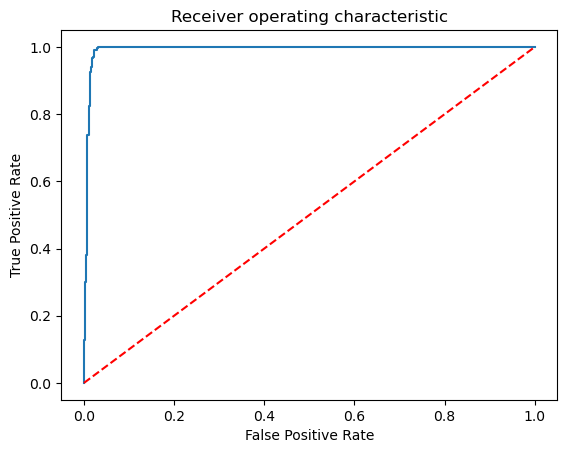

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [75]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'],train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1176
           1       0.95      1.00      0.97       689

    accuracy                           0.98      1865
   macro avg       0.97      0.98      0.98      1865
weighted avg       0.98      0.98      0.98      1865



In [76]:
from sklearn.metrics import classification_report
print(classification_report(test['Occupancy'],test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       517
           1       0.94      1.00      0.97       283

    accuracy                           0.98       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.98      0.98       800



# Model 3 :- Decision Tree

In [77]:
df3=df

# Data Import

In [78]:
df3 = pd.read_csv(r"F:\Imarticus learning\Capstone project 1\file.csv")
df3.head()

Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1

# Data Pre-Precossing

### Outlier

<Axes: >

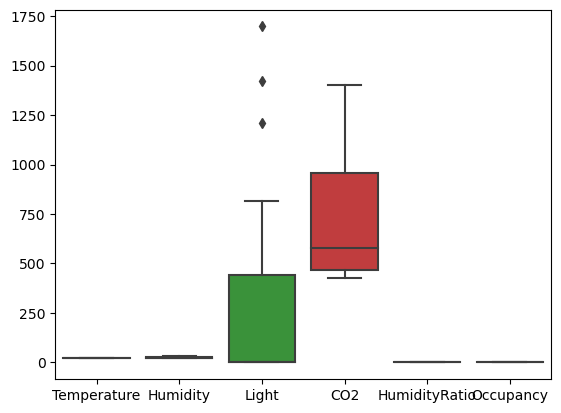

In [79]:
import seaborn as sns
sns.boxplot(data=df3)

In [80]:
for i in df3:               
    if df3[i].dtypes in ("float64","int64"): 
        q1 = df1[i].quantile(0.25)  
        q3 = df1[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr 
        df3[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

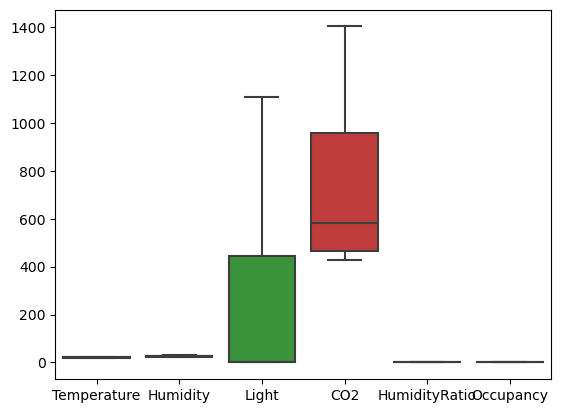

In [81]:
import seaborn as sns
sns.boxplot(data=df3)

# Data Visualisation

In [82]:
import plotly.express as px

fig = px.pie(df3,names='Occupancy',color='Occupancy',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

In [83]:
from sklearn.model_selection import train_test_split

x = df3.drop(['Occupancy'],axis=1)
y = df3[['Occupancy']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

In [84]:
X_train.shape

(1865, 5)

# Model Building

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 
dt.fit(X_train,y_train)

DecisionTreeClassifier()

# Plotting the Tree

In [86]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

Occupancy  Temperature   Humidity  Light          CO2  HumidityRatio
2064          0        20.79  24.926667    0.0   538.666667       0.003780
124           1        22.79  27.200000  444.0  1018.000000       0.004668
1555          1        22.79  30.917500  444.0  1366.250000       0.005311
203           0        22.50  25.000000  419.0   819.600000       0.004212
1657          1        22.60  30.445000  419.0  1241.333333       0.005169

In [87]:
independent_variable = list(train.columns[1:])
independent_variable

['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

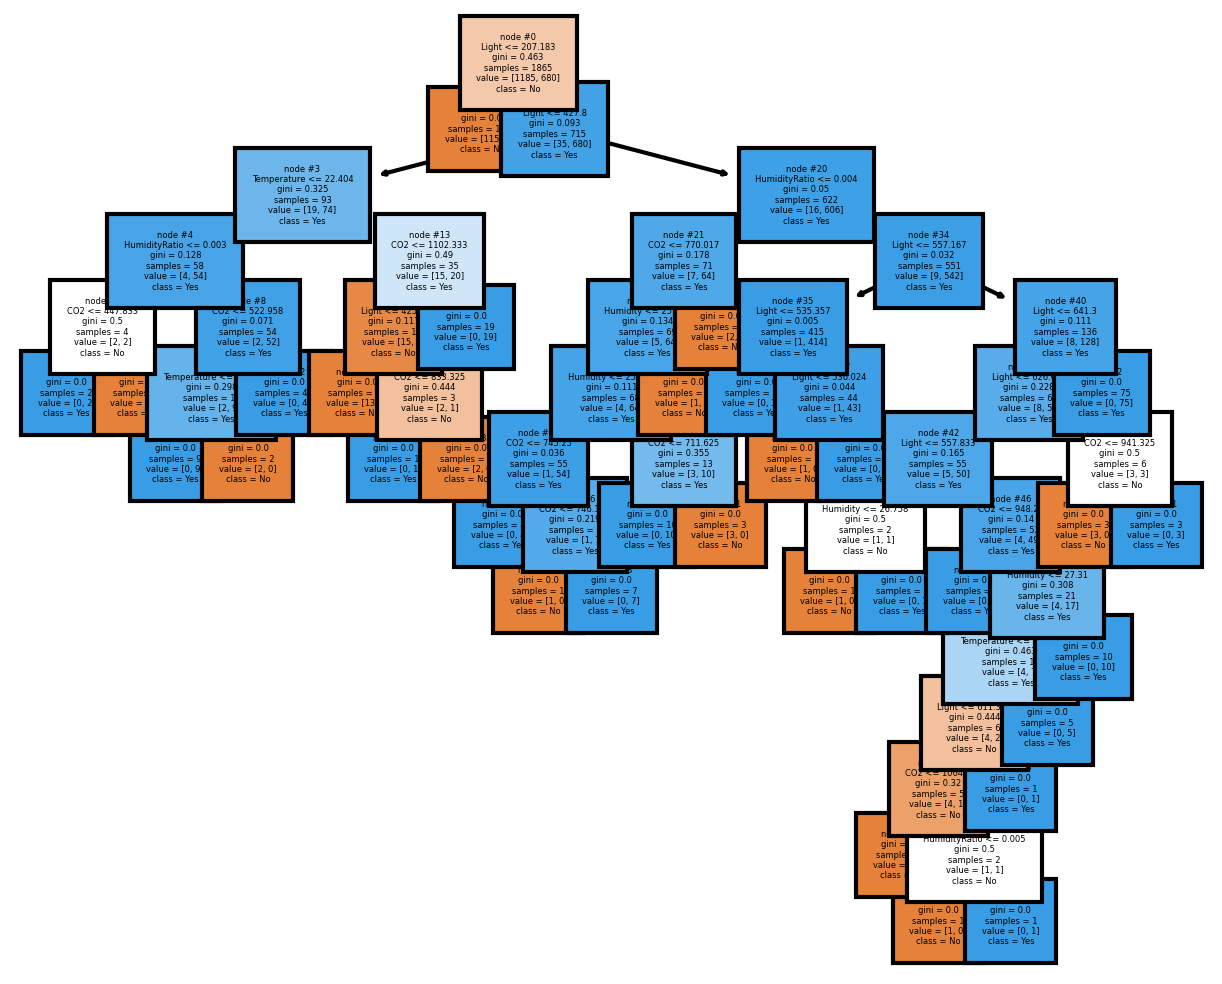

In [88]:
from sklearn import tree
import matplotlib.pyplot as plt

churn = ['No', 'Yes']  
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,   
               feature_names = independent_variable,  
               class_names = churn,
               filled = True, 
              node_ids=True,
              fontsize=2); 

# Prediction on Train dataset

In [89]:
train.head()

Occupancy  Temperature   Humidity  Light          CO2  HumidityRatio
2064          0        20.79  24.926667    0.0   538.666667       0.003780
124           1        22.79  27.200000  444.0  1018.000000       0.004668
1555          1        22.79  30.917500  444.0  1366.250000       0.005311
203           0        22.50  25.000000  419.0   819.600000       0.004212
1657          1        22.60  30.445000  419.0  1241.333333       0.005169

In [90]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

Occupancy  Temperature   Humidity  Light          CO2  HumidityRatio  \
2064          0        20.79  24.926667    0.0   538.666667       0.003780   
124           1        22.79  27.200000  444.0  1018.000000       0.004668   
1555          1        22.79  30.917500  444.0  1366.250000       0.005311   
203           0        22.50  25.000000  419.0   819.600000       0.004212   
1657          1        22.60  30.445000  419.0  1241.333333       0.005169   

      Predicted  
2064          0  
124           1  
1555          1  
203           0  
1657          1

# Model Performance Metrics

In [91]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Occupancy'])
print(matrix)

[[1185    0]
 [   0  680]]


In [92]:
Accuracy_Train=((748+252)/(1865)*100)
print(Accuracy_Train) 

53.61930294906166


In [93]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       680

    accuracy                           1.00      1865
   macro avg       1.00      1.00      1.00      1865
weighted avg       1.00      1.00      1.00      1865



# Model Improvement by Pruning Method ( Cut Tree)

In [94]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=60, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=60, min_samples_split=200)

In [95]:
X_train

Temperature   Humidity  Light          CO2  HumidityRatio
2064       20.790  24.926667    0.0   538.666667       0.003780
124        22.790  27.200000  444.0  1018.000000       0.004668
1555       22.790  30.917500  444.0  1366.250000       0.005311
203        22.500  25.000000  419.0   819.600000       0.004212
1657       22.600  30.445000  419.0  1241.333333       0.005169
...           ...        ...    ...          ...            ...
1898       21.000  25.890000    0.0   606.000000       0.003979
887        20.390  22.500000    0.0   438.000000       0.003327
710        20.600  22.200000    0.0   445.000000       0.003325
2505       20.754  24.870000  413.4   588.200000       0.003763
1200       21.700  27.972500  489.0  1080.500000       0.004491

[1865 rows x 5 columns]

In [96]:
X_train.shape

(1865, 5)

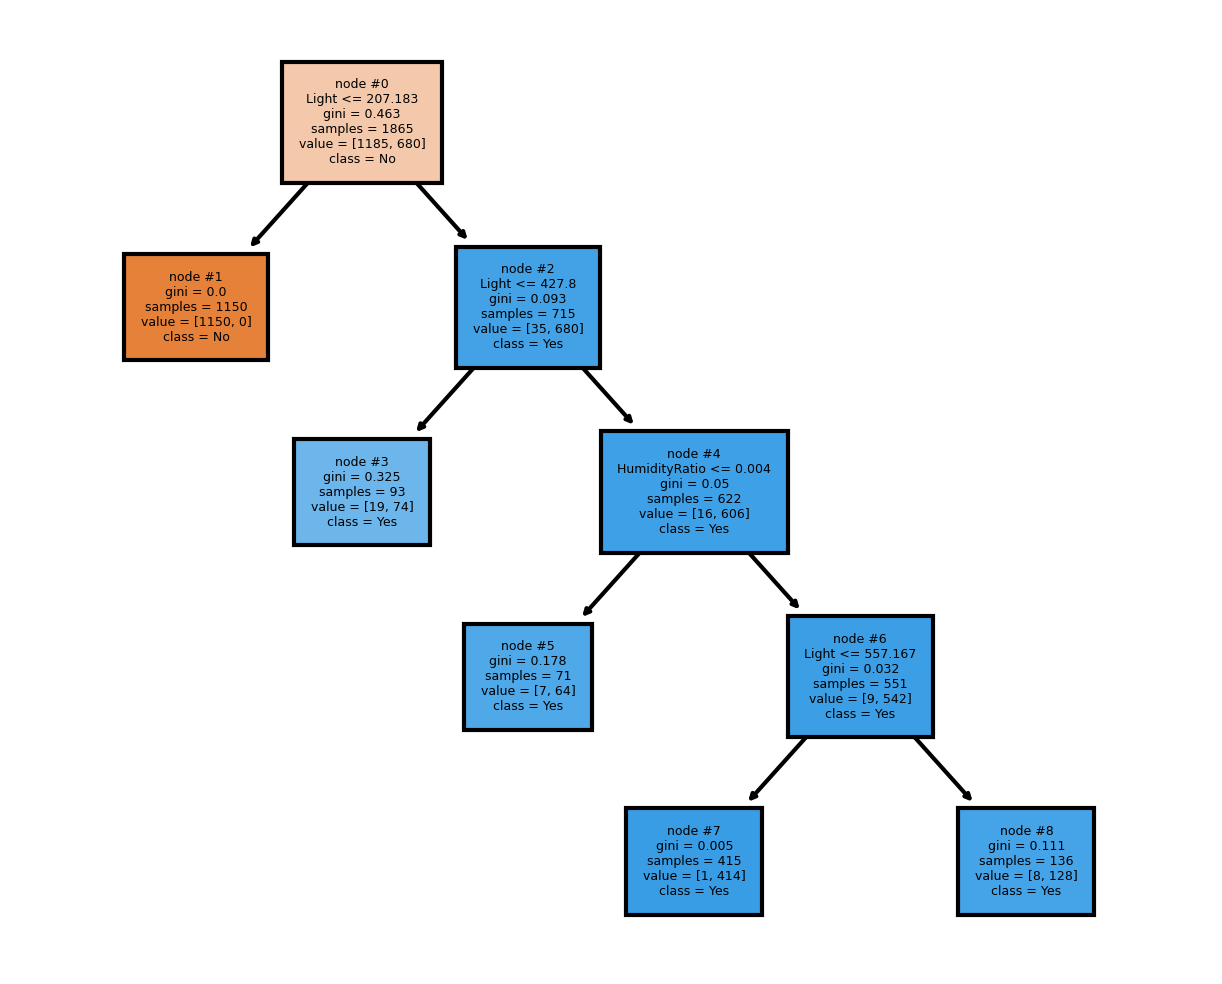

In [97]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 
#fig.savefig('imagename.png')

In [98]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

Occupancy  Temperature   Humidity  Light          CO2  HumidityRatio  \
2064          0        20.79  24.926667    0.0   538.666667       0.003780   
124           1        22.79  27.200000  444.0  1018.000000       0.004668   
1555          1        22.79  30.917500  444.0  1366.250000       0.005311   
203           0        22.50  25.000000  419.0   819.600000       0.004212   
1657          1        22.60  30.445000  419.0  1241.333333       0.005169   

      Predicted  
2064          0  
124           1  
1555          1  
203           1  
1657          1

In [99]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Occupancy'])
print(matrix)

[[1150    0]
 [  35  680]]


In [100]:
Accuracy_Train=((728 +267)/(1865)*100)
print(Accuracy_Train)

53.35120643431635


In [101]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1185
           1       0.95      1.00      0.97       680

    accuracy                           0.98      1865
   macro avg       0.98      0.99      0.98      1865
weighted avg       0.98      0.98      0.98      1865



# Predictions on Test Dataset

In [102]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

Temperature  Humidity  Light          CO2  HumidityRatio  Occupancy
935        20.290    22.700    0.0   436.500000       0.003336          0
1460       23.290    28.236  481.6  1116.000000       0.004997          1
942        20.272    22.680    0.0   437.000000       0.003329          0
22         23.600    27.236  498.4   925.200000       0.004910          1
831        20.390    22.500    0.0   435.666667       0.003327          0

In [103]:
test['Predicted'] = dt.predict(X_test)
test.head()

Temperature  Humidity  Light          CO2  HumidityRatio  Occupancy  \
935        20.290    22.700    0.0   436.500000       0.003336          0   
1460       23.290    28.236  481.6  1116.000000       0.004997          1   
942        20.272    22.680    0.0   437.000000       0.003329          0   
22         23.600    27.236  498.4   925.200000       0.004910          1   
831        20.390    22.500    0.0   435.666667       0.003327          0   

      Predicted  
935           0  
1460          1  
942           0  
22            1  
831           0

In [104]:
X_test.shape

(800, 5)

# Model Performance Metrics on Test data

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Occupancy'])
print(confusion_matrix)

[[487   0]
 [ 21 292]]


In [106]:
Accuracy_test=((487+292)/(800)*100)
Accuracy_test

97.375

# Sensitivity & Specificity 

### Train

In [107]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1185
           1       0.95      1.00      0.97       680

    accuracy                           0.98      1865
   macro avg       0.98      0.99      0.98      1865
weighted avg       0.98      0.98      0.98      1865



### Test

In [108]:
from sklearn.metrics import classification_report
print(classification_report(test['Occupancy'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       508
           1       0.93      1.00      0.97       292

    accuracy                           0.97       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.97      0.97       800



# Grid Search Method

In [109]:
params = { 'min_samples_split': [300,399,280,450], ## Parent 
           'min_samples_leaf': [60,70,90,100,150], ## Child or Leave 
           'max_depth':[3,4,6,8]}

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=65),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=65),
             param_grid={'max_depth': [3, 4, 6, 8],
                         'min_samples_leaf': [60, 70, 90, 100, 150],
                         'min_samples_split': [300, 399, 280, 450]},
             verbose=1)

In [111]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=60, min_samples_split=300,
                       random_state=65)

In [112]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=60, ## child
                                 min_samples_split=300, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=60, min_samples_split=300)

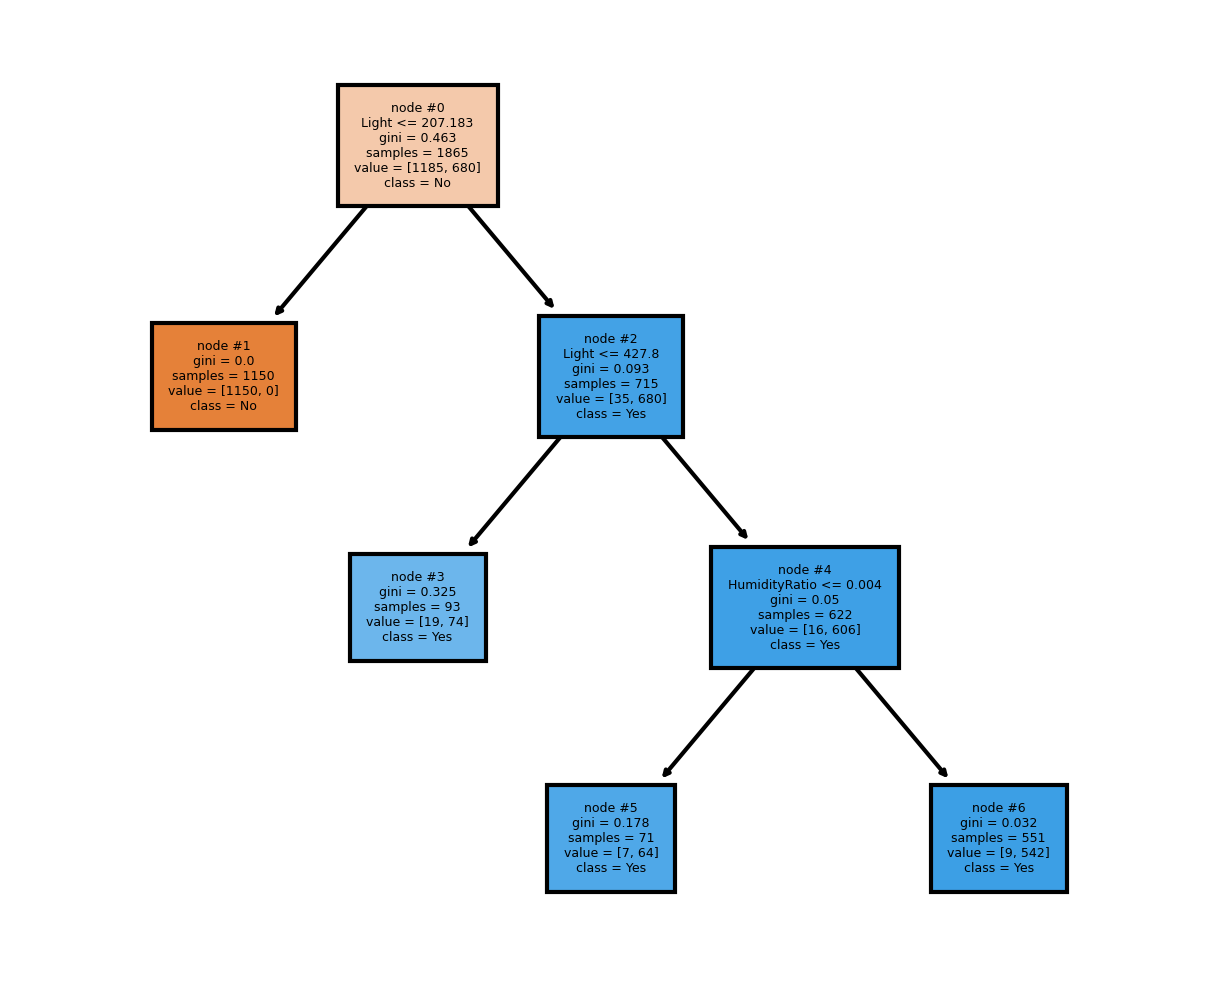

In [113]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 
#fig.savefig('imagename.png')

In [114]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

Occupancy  Temperature   Humidity  Light          CO2  HumidityRatio  \
2064          0        20.79  24.926667    0.0   538.666667       0.003780   
124           1        22.79  27.200000  444.0  1018.000000       0.004668   
1555          1        22.79  30.917500  444.0  1366.250000       0.005311   
203           0        22.50  25.000000  419.0   819.600000       0.004212   
1657          1        22.60  30.445000  419.0  1241.333333       0.005169   

      Predicted  
2064          0  
124           1  
1555          1  
203           1  
1657          1

In [115]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Occupancy'])
print(matrix)

[[1150    0]
 [  35  680]]


In [116]:
Accuracy_Train=((728 +267)/(1865)*100)
print(Accuracy_Train)

53.35120643431635


In [117]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1185
           1       0.95      1.00      0.97       680

    accuracy                           0.98      1865
   macro avg       0.98      0.99      0.98      1865
weighted avg       0.98      0.98      0.98      1865



In [118]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

Temperature  Humidity  Light          CO2  HumidityRatio  Occupancy
935        20.290    22.700    0.0   436.500000       0.003336          0
1460       23.290    28.236  481.6  1116.000000       0.004997          1
942        20.272    22.680    0.0   437.000000       0.003329          0
22         23.600    27.236  498.4   925.200000       0.004910          1
831        20.390    22.500    0.0   435.666667       0.003327          0

In [119]:
test['Predicted'] = dt.predict(X_test)
test.head()

Temperature  Humidity  Light          CO2  HumidityRatio  Occupancy  \
935        20.290    22.700    0.0   436.500000       0.003336          0   
1460       23.290    28.236  481.6  1116.000000       0.004997          1   
942        20.272    22.680    0.0   437.000000       0.003329          0   
22         23.600    27.236  498.4   925.200000       0.004910          1   
831        20.390    22.500    0.0   435.666667       0.003327          0   

      Predicted  
935           0  
1460          1  
942           0  
22            1  
831           0

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Occupancy'])
print(confusion_matrix)

[[487   0]
 [ 21 292]]


In [121]:
Accuracy_Test=((487 +292)/(800)*100)
print(Accuracy_Test)

97.375


In [122]:
from sklearn.metrics import classification_report
print(classification_report(test['Occupancy'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       508
           1       0.93      1.00      0.97       292

    accuracy                           0.97       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.97      0.97       800



# Model 4 :- Random Forest

In [123]:
df2=df

# Data Import

In [124]:
df2 = pd.read_csv(r"F:\Imarticus learning\Capstone project 1\file.csv")
df2.head()

Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
0      23.7000    26.272  585.200000  749.200000       0.004764          1
1      23.7180    26.290  578.400000  760.400000       0.004773          1
2      23.7300    26.230  572.666667  769.666667       0.004765          1
3      23.7225    26.125  493.750000  774.750000       0.004744          1
4      23.7540    26.200  488.600000  779.000000       0.004767          1

# Data Pre-Processing 

### Outliers 

<Axes: >

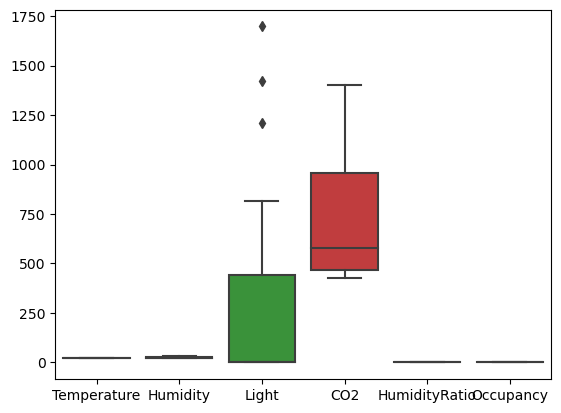

In [125]:
import seaborn as sns
sns.boxplot(data=df2)

In [126]:
for i in df2:               
    if df2[i].dtypes in ("float64","int64"): 
        q1 = df1[i].quantile(0.25)  
        q3 = df1[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr 
        df2[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

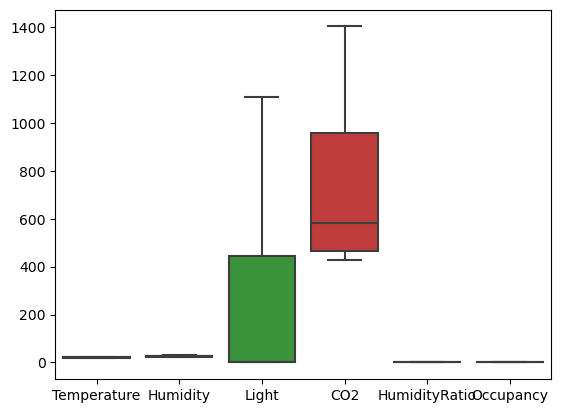

In [127]:
import seaborn as sns
sns.boxplot(data=df2)

# Data Visualization

In [128]:
import plotly.express as px

fig = px.pie(df2,names='Occupancy',color='Occupancy',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# Data Partition

In [129]:
from sklearn.model_selection import train_test_split

X = df2.drop('Occupancy', axis = 1)
Y = df2[['Occupancy']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=124)

In [130]:
X_train.shape

(1865, 5)

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
RFModel = RandomForestClassifier(n_estimators=25, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

RFModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25)

# Important Features

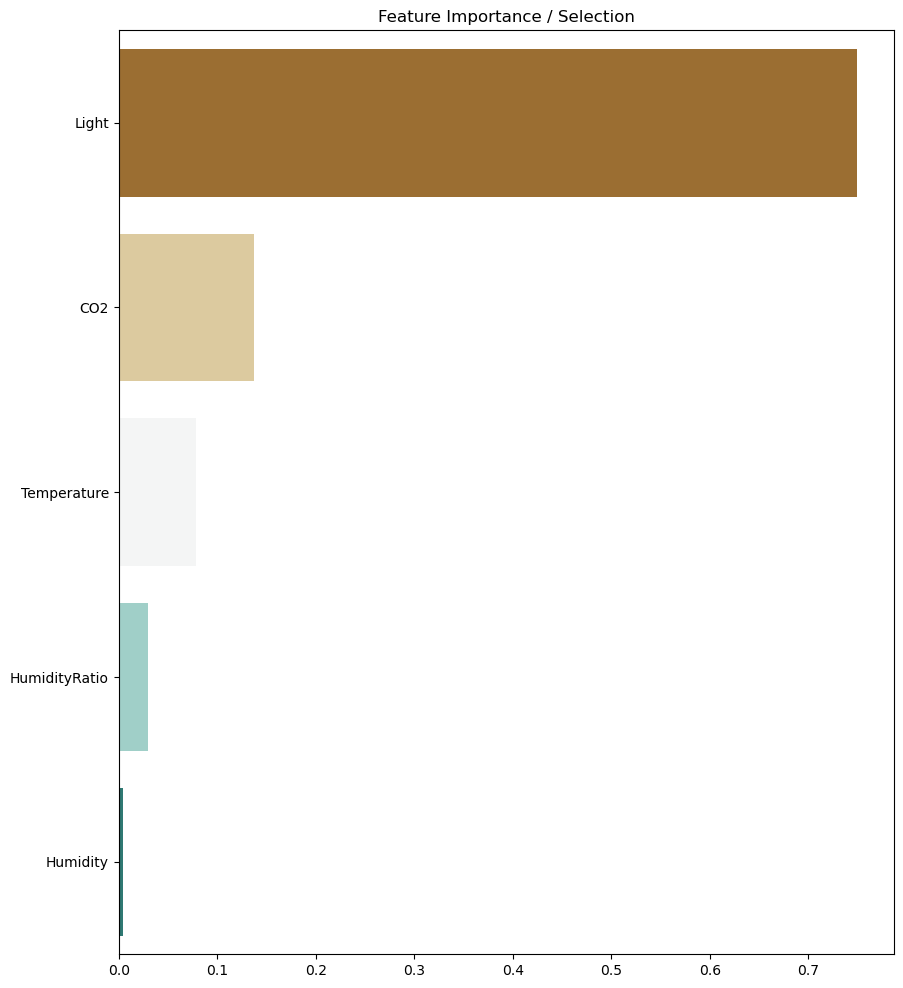

In [132]:
# Plot features importances
imp = pd.Series(data=RFModel.feature_importances_, index=RFModel.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

# Random Forest Visualization

In [133]:
from sklearn.tree import export_graphviz
import pydot

In [134]:
list(X.columns)

['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

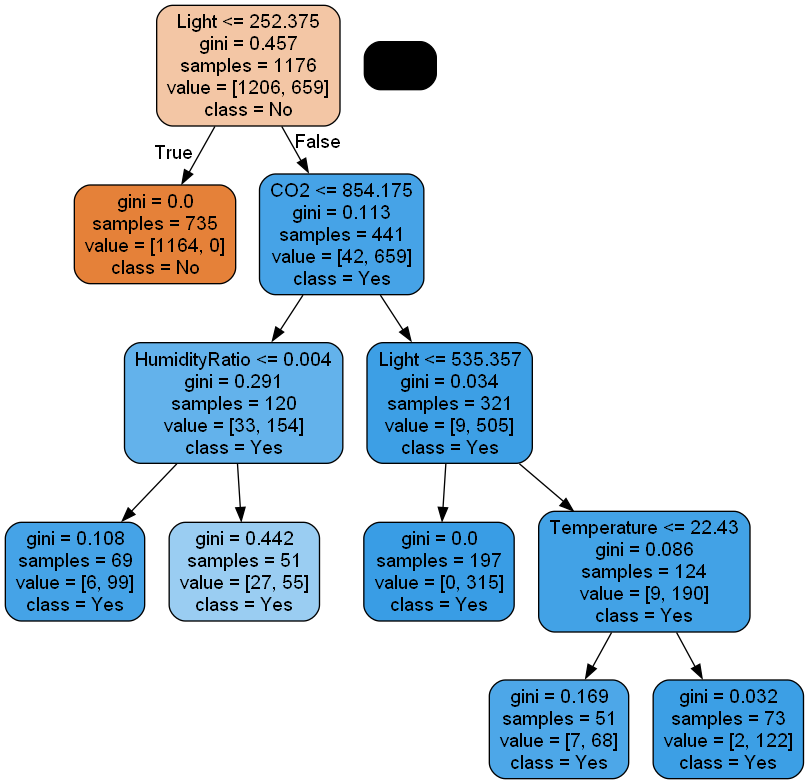

In [135]:
feature_list = list(X.columns)  # all independent variable name
Churn = ['No','Yes'] 

tree = RFModel.estimators_[10]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names = Churn,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

#  Predictions on Train Dataset

In [136]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

Temperature   Humidity       Light         CO2  HumidityRatio  Occupancy
2074    20.823333  24.926667    0.000000  533.666667       0.003788          0
2590    22.290000  25.963333  606.666667  950.333333       0.004320          0
2162    20.700000  25.100000    0.000000  497.000000       0.003786          0
1114    20.926667  24.790000  429.000000  709.000000       0.003791          1
2371    20.600000  24.365000    0.000000  464.000000       0.003651          0

In [137]:
train['Predicted'] = RFModel.predict(X_train)
train.head()

Temperature   Humidity       Light         CO2  HumidityRatio  \
2074    20.823333  24.926667    0.000000  533.666667       0.003788   
2590    22.290000  25.963333  606.666667  950.333333       0.004320   
2162    20.700000  25.100000    0.000000  497.000000       0.003786   
1114    20.926667  24.790000  429.000000  709.000000       0.003791   
2371    20.600000  24.365000    0.000000  464.000000       0.003651   

      Occupancy  Predicted  
2074          0          0  
2590          0          1  
2162          0          0  
1114          1          1  
2371          0          0

#   Model Performance Metrics

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['Occupancy'])
print(confusion_matrix)

[[1151    1]
 [  35  678]]


In [139]:
Accuracy_Train=((1151+678)/(1865)*100)
print(Accuracy_Train)

98.06970509383378


In [140]:
from sklearn.metrics import classification_report
print(classification_report(train['Occupancy'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1186
           1       0.95      1.00      0.97       679

    accuracy                           0.98      1865
   macro avg       0.98      0.98      0.98      1865
weighted avg       0.98      0.98      0.98      1865



# Predictions on Test Dataset

In [141]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

Temperature   Humidity  Light         CO2  HumidityRatio  Occupancy
2430    20.540000  24.100000    0.0  466.400000       0.003598          0
1791    21.200000  27.500000    0.0  747.000000       0.004280          0
2468    20.426667  23.823333    0.0  473.000000       0.003532          0
344     21.100000  23.392500    0.0  537.750000       0.003615          0
1731    21.600000  28.500000    0.0  911.333333       0.004548          0

In [142]:
test['Predicted'] = RFModel.predict(X_test)
test.head()

Temperature   Humidity  Light         CO2  HumidityRatio  Occupancy  \
2430    20.540000  24.100000    0.0  466.400000       0.003598          0   
1791    21.200000  27.500000    0.0  747.000000       0.004280          0   
2468    20.426667  23.823333    0.0  473.000000       0.003532          0   
344     21.100000  23.392500    0.0  537.750000       0.003615          0   
1731    21.600000  28.500000    0.0  911.333333       0.004548          0   

      Predicted  
2430          0  
1791          0  
2468          0  
344           0  
1731          0

In [143]:
X_test.shape

(800, 5)

# Model Performance Metrics on Test data 

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Occupancy'])
print(confusion_matrix)

[[487   0]
 [ 20 293]]


In [145]:
Accuracy_test=((487+293)/(800)*100)
Accuracy_test

97.5

In [146]:
from sklearn.metrics import classification_report
print(classification_report(test['Occupancy'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       507
           1       0.94      1.00      0.97       293

    accuracy                           0.97       800
   macro avg       0.97      0.98      0.97       800
weighted avg       0.98      0.97      0.98       800



In [147]:
print(classification_report(train['Occupancy'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1186
           1       0.95      1.00      0.97       679

    accuracy                           0.98      1865
   macro avg       0.98      0.98      0.98      1865
weighted avg       0.98      0.98      0.98      1865



# Comparing the results of Train/Test of each Algorithm

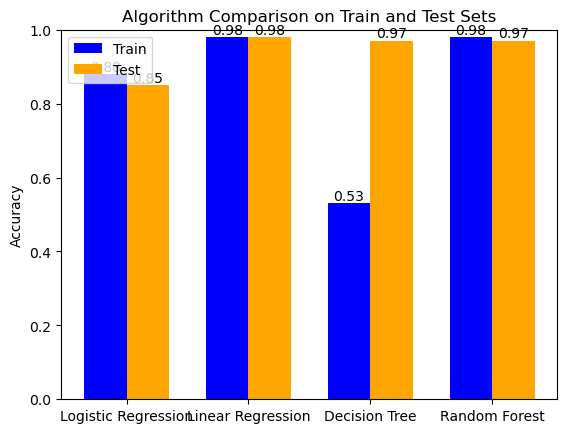

In [148]:
import matplotlib.pyplot as plt
import numpy as np

train_results_logreg = 0.88
test_results_logreg = 0.85

train_results_lreg = 0.98
test_results_lreg = 0.98

train_results_dt = 0.53
test_results_dt = 0.97

train_results_rf = 0.98
test_results_rf = 0.97

# Bar plot
models = ['Logistic Regression', 'Linear Regression','Decision Tree', 'Random Forest']
train_accuracies = [train_results_logreg, train_results_lreg,train_results_dt, train_results_rf]
test_accuracies = [test_results_logreg, test_results_lreg,test_results_dt, test_results_rf]

bar_width = 0.35
index = np.arange(len(models))

fig, ax = plt.subplots()
train_bars = ax.bar(index, train_accuracies, bar_width, label='Train', color='blue')
test_bars = ax.bar(index + bar_width, test_accuracies, bar_width, label='Test', color='orange')

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Algorithm Comparison on Train and Test Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Add values on top of the bars
for bar in train_bars + test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy values between 0 and 1
plt.show()


# Model for Deployment

In [149]:
import pickle

pickle.dump(RFModel, open(r'C:\Users\Atharva\OneDrive\Desktop\Capstone Project\build.pkl','wb'))  # Exporting model from python to laptop